In [2]:
import os
import sys

path_list = ['.', '..']
for p in path_list: sys.path.append(p) if p not in sys.path else print(f"Path: {p} is in sys.path")

import numpy as np
import xarray as xr

from Fires._macros.macros import (
	CURR_DIR,
	DRIVERS,
	TARGETS,
	DATA_PATH_025KM
)


In [2]:
from Fires._datasets.dataset_zarr import Dataset100

Dataset100()

In [3]:
from Fires._macros.macros import DATA_PATH_100KM

data100km = xr.open_zarr(DATA_PATH_100KM).load()
data100km

<xarray.Dataset>
Dimensions:    (time: 920, latitude: 180, longitude: 360)
Coordinates:
  * latitude   (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time       (time) datetime64[ns] 2001-01-01 2001-01-09 ... 2020-12-26
Data variables:
    fcci_ba    (time, latitude, longitude) float64 nan nan nan ... 0.0 0.0 0.0
    lai        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    lsm        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 1.0 1.0 1.0
    lst_day    (time, latitude, longitude) float32 nan nan nan ... 242.4 242.4
    rel_hum    (time, latitude, longitude) float32 76.84 76.92 ... 61.44 61.39
    sst        (time, latitude, longitude) float32 271.5 271.5 271.5 ... nan nan
    t2m_min    (time, latitude, longitude) float32 245.5 245.5 ... 242.4 242.5
    tp         (time, latitude, longitude) float32 0.2694 0.2612 ... 0.3219
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

In [4]:
print(data100km.fcci_ba.max(dim=['time', 'latitude', 'longitude'], skipna=True).data)
print(data100km.fcci_ba.mean(dim=['time', 'latitude', 'longitude'], skipna=True).data)
print(data100km.fcci_ba.min(dim=['time', 'latitude', 'longitude'], skipna=True).data)

0.05058420963192923
8.322125024829735e-05
0.0


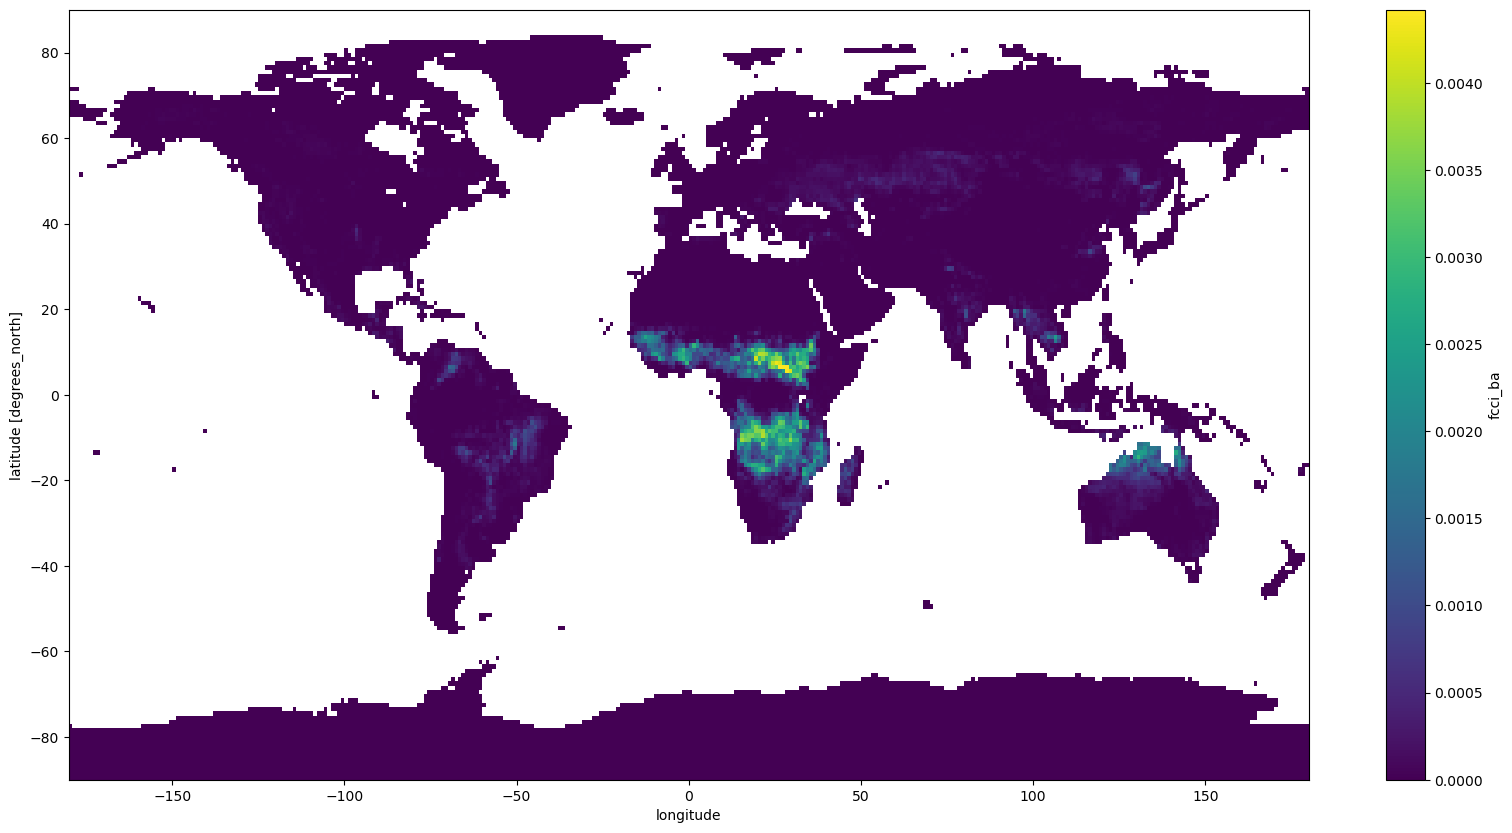

In [5]:
data100km.fcci_ba.mean(dim='time', skipna=True).plot(figsize=(20,10))

In [5]:
# from Fires._macros.macros import DATA_PATH_025KM, DATA_DIR, DRIVERS, TARGETS

# ds_25 = xr.open_zarr(os.path.join(DATA_DIR, 'sfv03_fcci.zarr'))[DRIVERS+TARGETS].sel(time=slice('2001', '2020'))
# ds_25.to_zarr(DATA_PATH_025KM)

In [8]:
# xr.open_zarr(DATA_PATH_025KM)[DRIVERS+TARGETS].load()

<xarray.Dataset>
Dimensions:    (time: 920, latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2001-01-01 2001-01-09 ... 2020-12-26
Data variables:
    lai        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    lst_day    (time, latitude, longitude) float32 nan nan nan ... 243.3 243.8
    rel_hum    (time, latitude, longitude) float32 78.89 78.89 ... 60.68 60.28
    sst        (time, latitude, longitude) float32 271.5 271.5 271.5 ... nan nan
    t2m_min    (time, latitude, longitude) float32 245.4 245.4 ... 243.1 243.3
    tp         (time, latitude, longitude) float32 0.1667 0.1667 ... 0.2682
    lsm        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 1.0 1.0 1.0
    fcci_ba    (time, latitude, longitude) float32 nan nan nan ... 0.0 0.0 0.0
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

In [2]:

# # define path to the original dataset
# dataset = xr.open_zarr(DATA_PATH_025KM)
# print(DRIVERS, TARGETS)

# # define features
# features = DRIVERS + TARGETS

# # features = list(dataset.data_vars)
# # # put the target variable as last in the list
# # features.append(features.pop(features.index('fcci_ba')))
# # # pop ssr variable
# # features.pop(features.index('ssr'))
# # # divide in drivers and targets
# # drivers, targets = features[:-1], [features[-1]]
# # # put the land-sea mask variable as last in the list
# # drivers.append(drivers.pop(drivers.index('lsm')))
# # # create the features list
# # features = drivers + targets

# # get the dataset with the new features list
# dataset = dataset[features].sel(time=slice('2001', '2020')).load()
# print(dataset)

# # ------------------------------------------------------------------------

# # load fcci_ba data
# fcci_ba_data = dataset['fcci_ba']
# # get sample
# fcci_ba_sample = fcci_ba_data.data[0]
# print(np.nanmax(fcci_ba_sample), np.nanmin(fcci_ba_sample))

# # ------------------------------------------------------------------------

# # descale target from 0-1 range to the original
# _maxhect_025 = pow((111/4), 2)*100
# dataset['fcci_ba'] = dataset['fcci_ba'] * _maxhect_025

# # ------------------------------------------------------------------------

# # convert from 25km to 100km
# dataset_100 = dataset.coarsen(latitude=4, longitude=4, boundary='trim').mean(skipna=True)
# dataset_100

# # ------------------------------------------------------------------------

# # scale target from original scale to 0-1 range
# _maxhect_100 = pow(111, 2)*100
# dataset_100['fcci_ba'] = dataset_100['fcci_ba'] / _maxhect_100

# # ------------------------------------------------------------------------

# fcci_data_100 = dataset_100['fcci_ba'].data[0]

# np.nanmax(fcci_data_100), np.nanmin(fcci_data_100), _maxhect_100, np.nanmax(fcci_data_100)*_maxhect_100

# # ------------------------------------------------------------------------

# dataset_100.to_zarr(os.path.join(_parent_dir, 'data', 'dataset_100km.zarr'))

# # ------------------------------------------------------------------------

# loaded_dataset = xr.open_zarr(os.path.join(_parent_dir, 'data', 'dataset_100km.zarr')).load()

# # ------------------------------------------------------------------------
